# Plot up some radio light curves for the proposal

Luckily I already have a lot of this code written for OTTER!

In [3]:
import os, glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

sb.set(context='notebook', style='white', palette='Set1')
plt.rcParams["font.family"] = "serif"
plt.rcParams["figure.dpi"] = 200
plt.rcParams["axes.grid.which"] = 'both'
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['font.size'] = 18

plt.rcParams['xtick.major.size'] = 3
plt.rcParams['ytick.major.size'] = 3

In [4]:
from otter import Otter
o = Otter('/home/nfranz/astro-otter/otterdb/.otter')
phot = o.getPhot(names=['AT2022cmc', 'AT2019dsg', 'Sw J1644+57', 'AT2020opy', 'AT2018hyz', 'IGR J12580+0134', ], 
                 flux_unit='mJy', return_type='pandas', obs_type='radio')
phot = phot.reset_index()

/home/nfranz/astro-otter/otter/src/otter/io/otter.py:156: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.



In [5]:
phot

,index,name,converted_flux,converted_flux_err,converted_date,converted_wave,converted_freq,converted_flux_unit,converted_date_unit,converted_wave_unit,converted_freq_unit,obs_type,upperlimit,telescope
0,0,AT2022cmc,0.033,0.0,59625.52,3.526970e+07,8.50,mJy,MJD,nm,GHz,radio,False,NaN
1,1,AT2022cmc,0.043,0.0,59626.52,3.526970e+07,8.50,mJy,MJD,nm,GHz,radio,False,NaN
2,2,AT2022cmc,0.073,0.0,59627.51,3.526970e+07,8.50,mJy,MJD,nm,GHz,radio,False,NaN
3,3,AT2022cmc,0.108,0.0,59630.25,3.526970e+07,8.50,mJy,MJD,nm,GHz,radio,False,NaN
4,4,AT2022cmc,0.108,0.0,59632.28,3.526970e+07,8.50,mJy,MJD,nm,GHz,radio,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,4,IGR J12580+0134,61.000,0.0,57609.00,4.996541e+07,6.00,mJy,MJD,nm,GHz,radio,False,NaN
59,5,IGR J12580+0134,36.320,0.0,57276.00,5.450772e+07,5.50,mJy,MJD,nm,GHz,radio,False,NaN
60,0,AT2020opy,0.047,0.0,59077.23,5.948263e+07,5.04,mJy,MJD,nm,GHz,radio,False,NaN
61,1,AT2020opy,0.091,0.0,59200.23,5.450772e+07,5.50,mJy,MJD,nm,GHz,radio,False,NaN


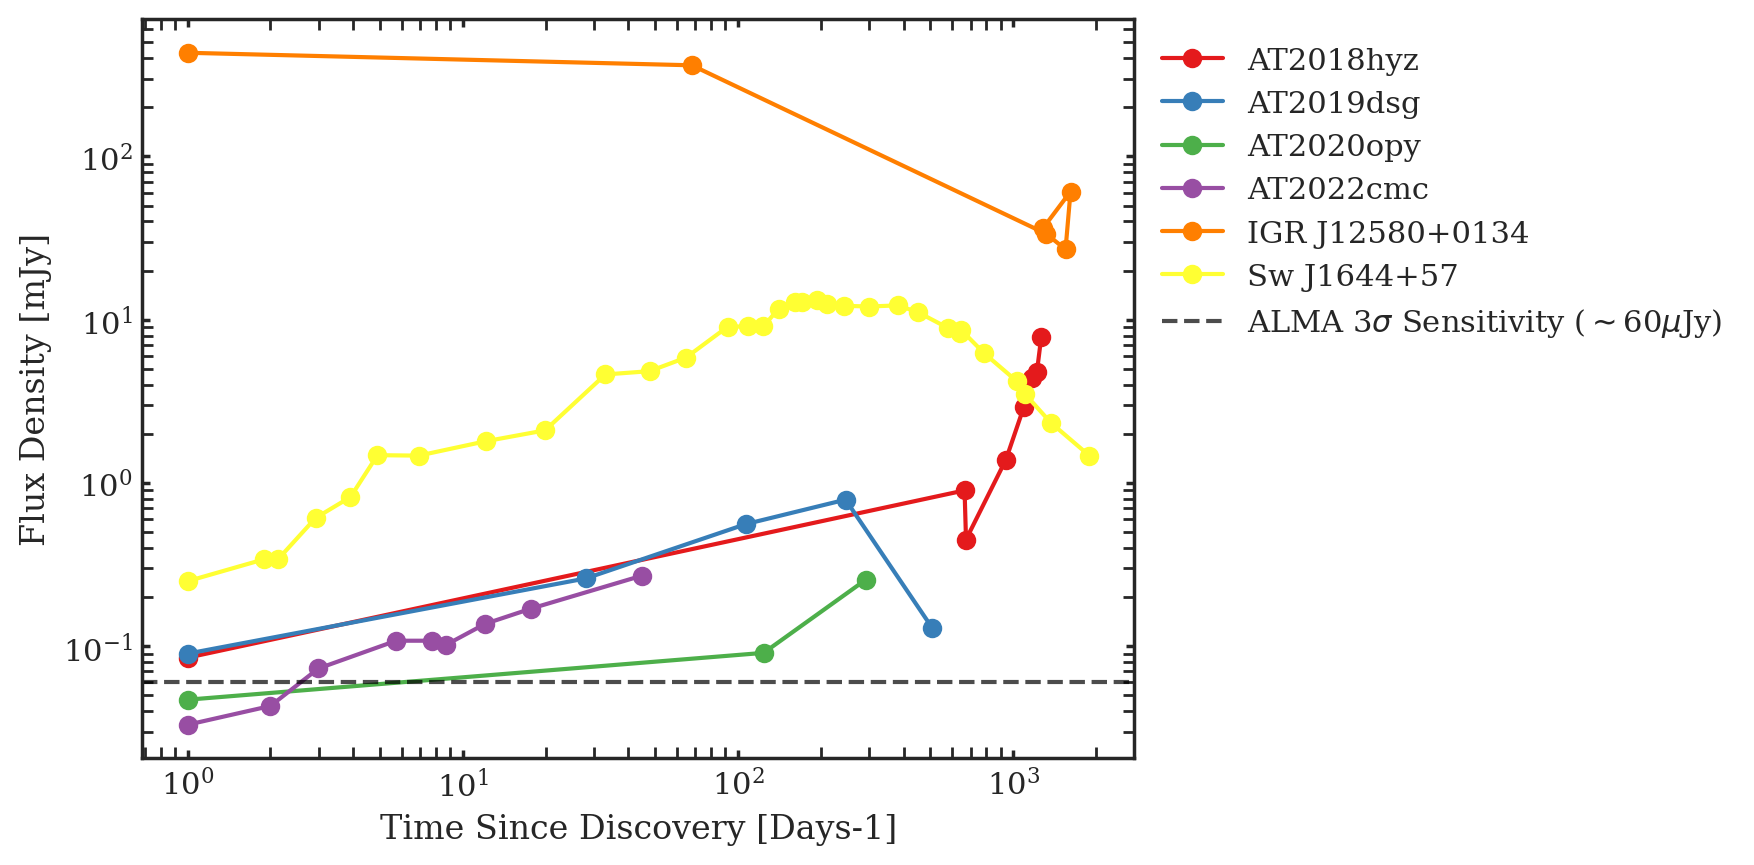

In [6]:
fig, ax = plt.subplots()
for lab, group in phot.groupby('name'):
    ax.plot(group.converted_date-(list(group.converted_date)[0])+1, group.converted_flux, 'o-', label=lab)
    
ax.axhline(60e-3, color='k', linestyle='--', alpha=0.7, label=r'ALMA 3$\sigma$ Sensitivity ($\sim$60$\mu$Jy)')
    
ax.legend(bbox_to_anchor=(1, 1), frameon=False,)
ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylabel('Flux Density [mJy]')
ax.set_xlabel('Time Since Discovery [Days-1]')

fig.savefig('lightcurves.png', transparent=True, bbox_inches='tight')

# Try with mm data from papers instead

In [7]:
def row_to_val(row, key='Flux Density'):
    if '<' in row[key]:
        return float(row[key].replace(' ','')[1:])
    return float(row[key].split('+')[0])

def row_to_err(row, key='Flux Density'):
    if '<' in row[key]:
        return 0
    return float(row[key].split('-')[-1])

def is_upperlimit(row, key='Flux Density'):
    if '<' in row[key]:
        return True
    return False

def get_facility(row):
    if '-' in row['Array Configuration']:
        return 'ALMA'
    return 'VLA'

def label(row, obj_name):
    # if row.t < 100: # if the time is less than 100 days
    #     # this is an "early time" observation
    #     return obj_name+r' ($\Delta t < 100$ days)'
    return obj_name#+r' ($\Delta t > 100$ days)'

In [24]:
# First Sw J1644+57
SwJ1644_files = glob.glob('SwJ1644+57*')

allswfiles = []
cite_map = {'Berger2012':'Berger et al. (2012)',
            'Zauderer2013': 'Zauderer et al. (2013)',
            'Eftekhari2018': 'Eftekhari et al. (2018)'}
for f in SwJ1644_files:
    df = pd.read_csv(f, sep='\t') 
    for c in cite_map.keys():
        if c in f:
            df['Citation'] = [cite_map[c]]*len(df)
            continue

    allswfiles.append(df)
    
SwJ1644_data = pd.concat(allswfiles)
SwJ1644_data.Facility = SwJ1644_data.Facility.fillna('VLA') # all of these observations were with the VLA

# clean the data
del SwJ1644_data['Unnamed: 4']
del SwJ1644_data['Unnamed: 3']
SwJ1644_data = SwJ1644_data.drop(0)

SwJ1644_data['FluxDensity'] = SwJ1644_data.apply(row_to_val, axis=1)
SwJ1644_data['FluxDensityErr'] = SwJ1644_data.apply(row_to_err, axis=1)

del SwJ1644_data['Flux Density']

SwJ1644_data.Frequency = SwJ1644_data.Frequency.astype(float)
SwJ1644_data.t = SwJ1644_data.t.astype(float)


ts = SwJ1644_data.t.unique()
m, M = int(ts.min()), int(ts.max())

vals = np.logspace(np.log10(m),np.log10(M), 11, dtype=int)
SwJ1644_data['TimeGroup'] = np.zeros(len(SwJ1644_data))
SwJ1644_data['Object'] = SwJ1644_data.apply(label, obj_name='Sw J1644+57', axis=1)
for idx, row in SwJ1644_data.iterrows():
    
    for val_min, val_max in zip(vals[:-1], vals[1:]):
        if row.t >= val_min and row.t <= val_max:
            SwJ1644_data.TimeGroup[idx] = f'{val_min}-{val_max} days'
            break
            
SwJ1644_data['t'] = SwJ1644_data.t.astype(float)
SwJ1644_data

/tmp/ipykernel_15275/2284446150.py:44: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,t,Facility,Frequency,Citation,FluxDensity,FluxDensityErr,TimeGroup,Object
1,244.23,JVLA,1.8,Zauderer et al. (2013),2.29,0.08,5-10 days,Sw J1644+57
2,271.95,JVLA,1.8,Zauderer et al. (2013),2.02,0.23,75-143 days,Sw J1644+57
3,383.92,JVLA,1.8,Zauderer et al. (2013),4.37,0.10,143-273 days,Sw J1644+57
4,452.66,JVLA,1.8,Zauderer et al. (2013),3.77,0.09,143-273 days,Sw J1644+57
5,581.31,JVLA,1.8,Zauderer et al. (2013),2.88,0.08,3-5 days,Sw J1644+57
...,...,...,...,...,...,...,...,...
249,18.25,SMA,230.0,Berger et al. (2012),9.90,1.40,10-20 days,Sw J1644+57
250,20.24,SMA,230.0,Berger et al. (2012),8.20,1.40,20-39 days,Sw J1644+57
251,21.25,SMA,230.0,Berger et al. (2012),8.30,2.20,20-39 days,Sw J1644+57
252,125.05,SMA,230.0,Berger et al. (2012),6.10,0.65,75-143 days,Sw J1644+57


In [25]:
# Now AT2019dsg
dsg = pd.read_csv('AT2019dsg_Cendes2021.txt', sep=',')

dsg['FluxDensity'] = dsg.apply(row_to_val, axis=1)
dsg['FluxDensityErr'] = dsg.apply(row_to_err, axis=1)
dsg['Upperlimit'] = dsg.apply(is_upperlimit, axis=1)
dsg['Facility'] = dsg.apply(get_facility, axis=1)
dsg['Object'] = dsg.apply(label, obj_name='AT2019dsg', axis=1)

dsg['t'] = dsg.t.astype(float) 
dsg['Citation'] = ['Cendes et al. (2021)']*len(dsg)

dsg

,Date,t,Array Configuration,Frequency,Flux Density,FluxDensity,FluxDensityErr,Upperlimit,Facility,Object,Citation
0,2019 May 24,55.0,B,5.0,0.09 +or- 0.01,0.09,0.01,False,VLA,AT2019dsg,Cendes et al. (2021)
1,2019 May 24,55.0,B,7.0,0.19 +or- 0.01,0.19,0.01,False,VLA,AT2019dsg,Cendes et al. (2021)
2,2019 May 24,55.0,B,13.0,0.48 +or- 0.02,0.48,0.02,False,VLA,AT2019dsg,Cendes et al. (2021)
3,2019 May 24,55.0,B,15.0,0.54 +or- 0.02,0.54,0.02,False,VLA,AT2019dsg,Cendes et al. (2021)
4,2019 May 24,55.0,B,17.0,0.58 +or- 0.02,0.58,0.02,False,VLA,AT2019dsg,Cendes et al. (2021)
...,...,...,...,...,...,...,...,...,...,...,...
57,2020 Jan 24,300.0,D,17.0,0.23 +or- 0.03,0.23,0.03,False,VLA,AT2019dsg,Cendes et al. (2021)
58,2020 Oct 11,561.0,B,1.5,0.35 +or- 0.05,0.35,0.05,False,VLA,AT2019dsg,Cendes et al. (2021)
59,2020 Oct 11,561.0,B,2.6,0.26 +or- 0.02,0.26,0.02,False,VLA,AT2019dsg,Cendes et al. (2021)
60,2020 Oct 11,561.0,B,3.4,0.17 +or- 0.01,0.17,0.01,False,VLA,AT2019dsg,Cendes et al. (2021)


In [26]:
# AT2022cmc

cmc = np.loadtxt('cmc_data_new.txt', delimiter=None, dtype=str, skiprows=1)

cmc = pd.DataFrame(cmc, columns=['t', 'q', 'F', 'dF', 'det', 'obs', 'band', 'refs'])

cmc['FluxDensity'] = cmc.F.astype(float)*1e-3
cmc['FluxDensityErr'] = cmc.dF.astype(float)*1e-3
cmc['Object'] = ['AT2022cmc']*len(cmc)

In [37]:
# AT2019qiz

qiz = np.loadtxt('AT2019qiz_mm.txt', delimiter=None, dtype=str, skiprows=1)
print(qiz)


qiz = pd.DataFrame(qiz, columns=['t', 'F', 'dF'])
print(qiz)


qiz['FluxDensity'] = qiz.F.astype(float)*1e-3
qiz['FluxDensityErr'] = qiz.dF.astype(float)*1e-3
qiz['Object'] = ['AT2019qiz']*len(qiz)

print(qiz)


[['8' '104.4' '14.2']
 ['31' '711.8' '23']
 ['42' '1213.5' '18.5']
 ['59' '471.2' '15.8']
 ['76' '408.8' '15.2']
 ['129' '310.2' '22']]
     t       F    dF
0    8   104.4  14.2
1   31   711.8    23
2   42  1213.5  18.5
3   59   471.2  15.8
4   76   408.8  15.2
5  129   310.2    22
     t       F    dF  FluxDensity  FluxDensityErr     Object
0    8   104.4  14.2       0.1044          0.0142  AT2019qiz
1   31   711.8    23       0.7118          0.0230  AT2019qiz
2   42  1213.5  18.5       1.2135          0.0185  AT2019qiz
3   59   471.2  15.8       0.4712          0.0158  AT2019qiz
4   76   408.8  15.2       0.4088          0.0152  AT2019qiz
5  129   310.2    22       0.3102          0.0220  AT2019qiz


In [59]:
# ASASSN-19bt

asassn19bt = np.loadtxt('asassn19bt_alma.txt', delimiter=',', dtype=str, skiprows=1)
asassn19bt = pd.DataFrame(asassn19bt, columns=['freq', 'F', 'dF', 't', 'upperlimit'])

asassn19bt['FluxDensity'] = asassn19bt.F.astype(float)*1e-3
asassn19bt['FluxDensityErr'] = asassn19bt.dF.astype(float)*1e-3
asassn19bt['Object'] = ['ASASSN-19bt']*len(asassn19bt)
asassn19bt['Upperlimit'] = asassn19bt.upperlimit.astype(int).astype(bool)

asassn19bt

,freq,F,dF,t,upperlimit,FluxDensity,FluxDensityErr,Object,Upperlimit
0,97.5,143,28,40,0,0.143,0.028,ASASSN-19bt,False
1,97.5,89,20,61,0,0.089,0.020,ASASSN-19bt,False
2,97.5,60,17,81,0,0.060,0.017,ASASSN-19bt,False
3,97.5,31,0,149,1,0.031,0.000,ASASSN-19bt,True


In [94]:
data = pd.concat([SwJ1644_data, dsg, cmc, qiz, asassn19bt]).reset_index(drop=True, inplace=False)

symb_map = {'Sw J1644+57':'s', 
            'AT2019dsg':'o', 
            'AT2022cmc':'s', 
            'AT2019qiz':'o',
            'ASASSN-19bt':'*'
           }

data['symb'] = data.apply(lambda row: 'v' if row.Upperlimit and not np.isnan(row.Upperlimit) else symb_map[row.Object], axis=1)

data.Object.unique()

array(['Sw J1644+57', 'AT2019dsg', 'AT2022cmc', 'AT2019qiz',
       'ASASSN-19bt'], dtype=object)

In [95]:
cmc[cmc.obs=='ALMA'].band

15     3mm
16     3mm
17     3mm
22     1mm
23     1mm
24     1mm
25     1mm
26     1mm
49     1mm
50     3mm
66     3mm
67     1mm
68     3mm
69     1mm
83     1mm
101    1mm
102    3mm
120    1mm
121    3mm
156    3mm
157    3mm
175    3mm
Name: band, dtype: object

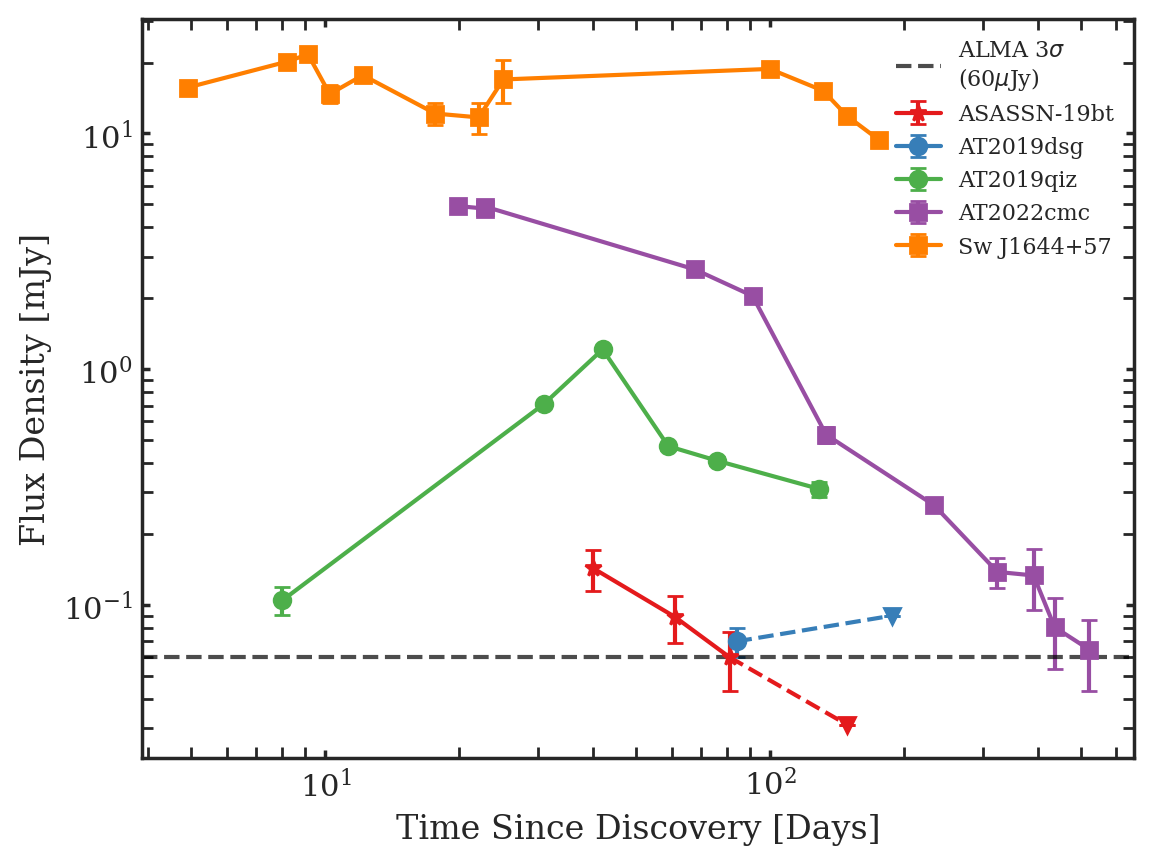

In [96]:
swmm = data[data.Frequency == 87]
dsgmm = data[data.Frequency == 97.5]
cmcmm = data[(data.obs == 'ALMA') * (data.band == '3mm')]
qizmm = data[data.Object == 'AT2019qiz'] # all of this is band3 data
bt = data[data.Object == 'ASASSN-19bt']

mmdata = pd.concat([swmm, dsgmm, cmcmm, qizmm, bt])

fig, ax = plt.subplots()
lines = None
for lab, group in mmdata.groupby('Object'):
    for marker, markergrp in group.groupby('symb'):
        if lines is None:
            line_color = None
        else:
            line_color = lines[-1][0].get_color()
            
        lines = ax.errorbar(markergrp.t.astype(float), markergrp.FluxDensity.astype(float), marker=marker, 
                            yerr=markergrp.FluxDensityErr.astype(float), capsize=3, label=lab, color=line_color)
        
        if marker == 'v': # draw a dashed line between the previous last point and this first point
            ax.plot([prev_grp.t.astype(float).iloc[-1],markergrp.t.astype(float).iloc[0]], 
                    [prev_grp.FluxDensity.astype(float).iloc[-1],markergrp.FluxDensity.astype(float).iloc[0]],
                   color=lines[-1][0].get_color(), linestyle='--')
        
        prev_grp = markergrp
        
        lab = None
        
    lines = None
    
ax.axhline(60e-3, color='k', linestyle='--', alpha=0.7, label='ALMA 3$\sigma$ \n(60$\mu$Jy)')
    
ax.legend(frameon=False,loc='upper right',fontsize=8)
ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylabel('Flux Density [mJy]')
ax.set_xlabel('Time Since Discovery [Days]')

fig.savefig('lightcurves.png', transparent=True, bbox_inches='tight')

In [41]:
qizmm

,t,Facility,Frequency,Citation,FluxDensity,FluxDensityErr,TimeGroup,Object,Date,Array Configuration,Flux Density,Upperlimit,q,F,dF,det,obs,band,refs
630,8,NaN,NaN,NaN,0.1044,0.0142,NaN,AT2019qiz,NaN,NaN,NaN,NaN,NaN,104.4,14.2,NaN,NaN,NaN,NaN
631,31,NaN,NaN,NaN,0.7118,0.0230,NaN,AT2019qiz,NaN,NaN,NaN,NaN,NaN,711.8,23,NaN,NaN,NaN,NaN
632,42,NaN,NaN,NaN,1.2135,0.0185,NaN,AT2019qiz,NaN,NaN,NaN,NaN,NaN,1213.5,18.5,NaN,NaN,NaN,NaN
633,59,NaN,NaN,NaN,0.4712,0.0158,NaN,AT2019qiz,NaN,NaN,NaN,NaN,NaN,471.2,15.8,NaN,NaN,NaN,NaN
634,76,NaN,NaN,NaN,0.4088,0.0152,NaN,AT2019qiz,NaN,NaN,NaN,NaN,NaN,408.8,15.2,NaN,NaN,NaN,NaN
635,129,NaN,NaN,NaN,0.3102,0.0220,NaN,AT2019qiz,NaN,NaN,NaN,NaN,NaN,310.2,22,NaN,NaN,NaN,NaN
